# pyAp - Stoichiometry calculation and ternary plot of apatite

pyAp supports stoichiometry calculations for F, Cl, and OH-apatite with the built-in function `ApStoic.py`. Consequently, the results can be plotted in the F-Cl-OH ternary diagram by calling functions in `ApThernary.py`.

Below we show an example of stoichiometry calculation  and visualize the results in a ternary diagram.

### 1. Import modules

import releavant modules.

In [1]:
import os, sys, numpy as np, matplotlib.pyplot as plt, pandas as pd, math
from pathlib import Path
# hack to allow scripts to be placed in subdirectories next to pyAp:
if not os.path.exists('pyAp') and os.path.exists('../pyAp'):
    sys.path.insert(1, os.path.abspath('..'))

from pyAp.ApStoic import stoi_
from pyAp import ApTernary

### 2. Import data 

In [2]:
data = pd.read_excel('data_ap_major_volatile.xlsx')

The stoichiometry calculation allows users to choose oxygen number 26 for F- or Cl-apatite or 25 for OH-apatite by assigning an instance to the `assume_oxy` in the `stoi_()`. If no value is assigned, the default will be 26.

In [3]:
results_stoi = stoi_(data,assume_oxy = 26) 
results_stoi

SI        TI        AL        FE         CA        MG        MN  \
0  0.017412  0.013097  0.020520  0.014561  10.072936  0.025958  0.014746   
1  0.017514  0.013175  0.020641  0.014647  10.132331  0.026111  0.014833   
2  0.017419  0.013103  0.020528  0.014567  10.077123  0.025968  0.014752   

          K        NA         P         S         C        XF       XCL  \
0  0.022210  0.033756  5.895973  0.026133  0.002377  0.825950  0.073766   
1  0.022341  0.033955  5.930739  0.026287  0.002391  0.692350  0.059361   
2  0.022219  0.033770  5.898424  0.026144  0.002378  0.771207  0.118075   

        XOH        CE        SR  stoi,(Ca/P-5/3)/(5/3)*100% sample  
0  0.100284  0.012748  0.010095                    3.656599    Ap1  
1  0.248289  0.012823  0.010155                    3.656599    Ap2  
2  0.110718  0.012753  0.010100                    3.656599    Ap3

To check the calculation, the sum of calculated F, Cl and H2O (OH) fraction should be 1.

In [4]:
results_stoi['XF'] + results_stoi['XCL'] + results_stoi['XOH'] 

0    1.0
1    1.0
2    1.0
dtype: float64

### 3. Ternary plot
Choose the data you would like to plot in ternary diagram

If you have calculated F-Cl-OH mole fractions from lines above

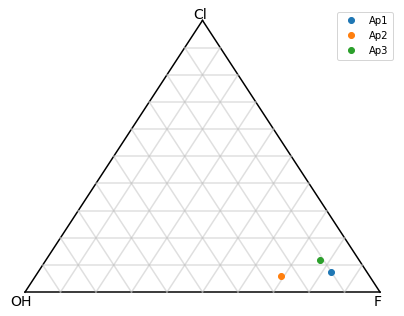

In [5]:
ApTernary.ternary(1)

for idx, value in results_stoi.iterrows():

    x_f = value['XF']
    x_cl = value['XCL']
    x = (x_f + x_cl/2) * 100
    y = x_cl*math.sqrt(3)*50

    if x > 100:
        x = 100
    if y > math.sqrt(3)*50:
        y = math.sqrt(3)*50
        
    plt.plot(x,y,'o',label=value['sample'])

plt.legend(loc='best')
plt.show()

Or you have known F-Cl-OH mole fractions and they are in excel file

In [6]:
df = pd.read_excel('data_calc_water.xlsx')

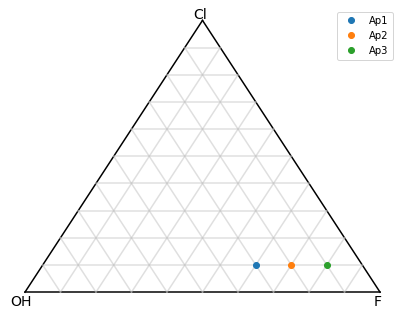

In [7]:
ApTernary.ternary(1)


for idx, value in df.iterrows():

    x_f = value['XF']
    x_cl = value['XCL']
    x = (x_f + x_cl/2) * 100
    y = x_cl*math.sqrt(3)*50

    if x > 100:
        x = 100
    if y > math.sqrt(3)*50:
        y = math.sqrt(3)*50
        
    plt.plot(x,y,'o',label=value['sample'])

plt.legend(loc='best')
plt.show()